# Lab 1: PyTorch basic practice

###1. import the required libraries 

In [ ]:
import cv2
import torch
import glob
import numpy as np

from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('sample_data/drive')


Drive already mounted at sample_data/drive; to attempt to forcibly remount, call drive.mount("sample_data/drive", force_remount=True).


####2. Read in the images (1.png, 2.png, 3.png, 4.png) in the current directory and save them to a list (so the length of this list is 4). Each element in this list is a numpy array (an image). All the images have the same shape **(height, width, channel)**, which is (555, 695, 3) in this **lab**.

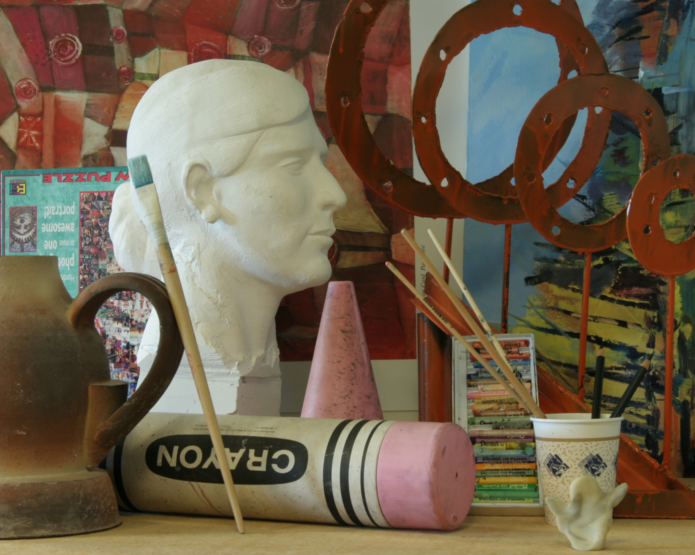

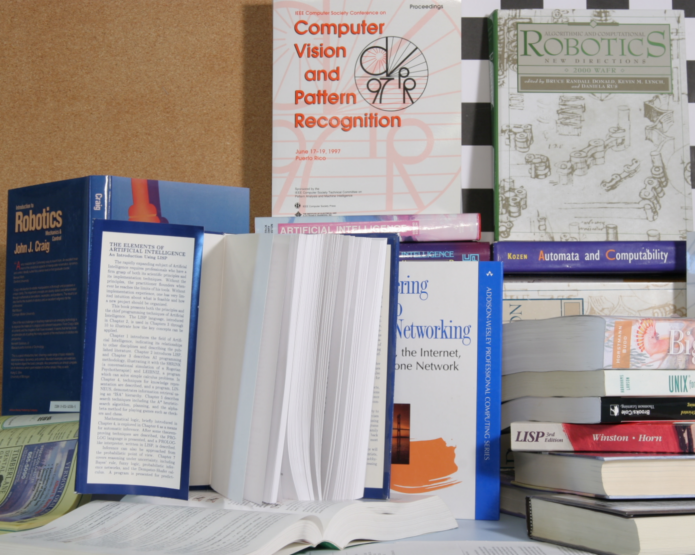

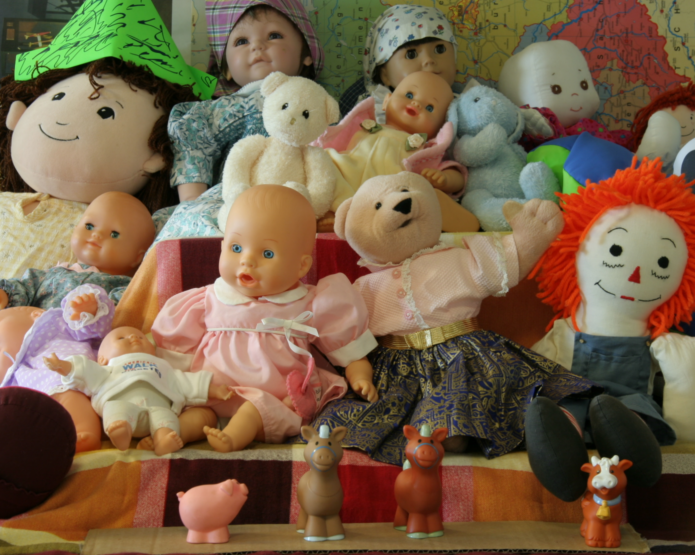

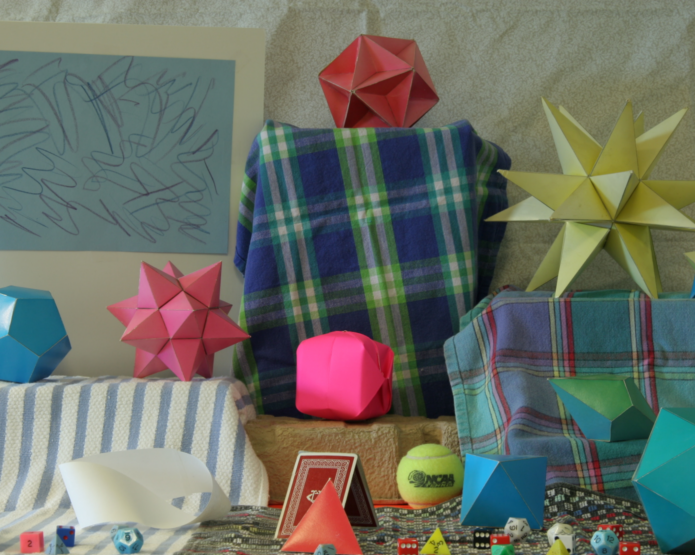

In [ ]:
img_list = [] # a list used to save all the images in the current directory
#for img in glob.glob("*.png"):
 #   image = cv2.imread(img)
  #  img_list.append(image)
  


#Upload Files from Google Drive to Avoid Colab Runtime Limit
for img in glob.glob("sample_data/drive/MyDrive/Colab Notebooks/Lab_1/Images/*.png"):
  image = cv2.imread(img)
  img_list.append(image)
  cv2_imshow(image)

####3. Convert "**img_list**" to a 4-D tensor "**img_tensor**".The shape of this tensor is **(b,c,h,w)**. Where 
b: batch size, which is 4 in this lab

c: the number of channels. Since they are all color images, it is 3.

h: the height of each image. 555

w: the width of each image. 695

In [ ]:
img_tensor = torch.tensor(img_list)   # Lower Case "t", makes tensor
img_tensor.shape # displays shape before to permutation

img_tensor = img_tensor.permute(0,3,1,2) # Permutes data to (b,c,h,w)

img_tensor.shape #displays shape after permutation


torch.Size([4, 3, 555, 695])

#### 4. Split the 4-D tensor "img_tensor" into three new 4-D tensors based on the blue, green and red channels of the image, and name them "blue_tensor", "green_tensor" and "red_tensor" (because OpenCV chooses BGR color format )

In [ ]:
# Line below splits the 4d tensor into 3 tensors baed on channel color
blue_tensor, green_tensor, red_tensor = img_tensor.split([1,1,1],dim=1)

# Line below displays shape of the 3 new tensors
blue_tensor.shape, green_tensor.shape, red_tensor.shape

(torch.Size([4, 1, 555, 695]),
 torch.Size([4, 1, 555, 695]),
 torch.Size([4, 1, 555, 695]))

####5. For every image, increase each pixel value of the green channel by 40, increase each pixel value of the blue channel by 10, and decrease each pixel value of the red channel by 20. This operation should be performed directly on the three tensors (blue_tensor, green_tensor, red_tensor)

In [ ]:
new_blue_tensor = blue_tensor + 10
new_green_tensor = green_tensor + 40
new_red_tensor = red_tensor - 20

print(blue_tensor)
print(new_blue_tensor[0][0])


tensor([[[[ 43,  44,  44,  ...,  71,  67,  84],
          [ 43,  45,  44,  ...,  45,  51,  80],
          [ 43,  44,  44,  ...,  55,  61,  87],
          ...,
          [121, 128, 130,  ...,  82,  79,  77],
          [122, 127, 129,  ...,  82,  83,  83],
          [117, 120, 117,  ...,  85,  83,  81]]],


        [[[ 74,  74,  76,  ...,  70,  70,  70],
          [ 76,  73,  70,  ...,  71,  71,  71],
          [ 77,  76,  72,  ...,  70,  71,  71],
          ...,
          [175, 176, 177,  ..., 195, 195, 193],
          [174, 175, 175,  ..., 191, 191, 191],
          [175, 175, 175,  ..., 168, 162, 156]]],


        [[[ 61,  61,  60,  ...,  82,  83,  83],
          [ 64,  63,  62,  ...,  82,  82,  83],
          [ 64,  63,  62,  ...,  83,  83,  83],
          ...,
          [ 34,  29,  26,  ...,  16,  16,  15],
          [ 32,  29,  25,  ...,  17,  17,  17],
          [ 27,  25,  26,  ...,  18,  18,  18]]],


        [[[147, 145, 135,  ..., 111, 111, 119],
          [146, 143, 139,  ...,

#### 6. Combine/Merge these three revised tensors (green_tensor, blue_tensor, red_tensor) into a new one and convert it into a numpy array that can be visualized by OpenCV. Plot these new 4 images.

Please note that the order of the color format is blue, green and red.
And the shape of an image（numpy array）that can be visualized is （height, width, channel)

1. To convert a tensor to a numpy array, you can use x.numpy(), where x is a tensor.  
2. Google colab crashes if you try to display image using *cv2.imshow()* ,instead import ***from google.colab.patches import cv2_imshow*** and display using **cv2_imshow(<image>)**

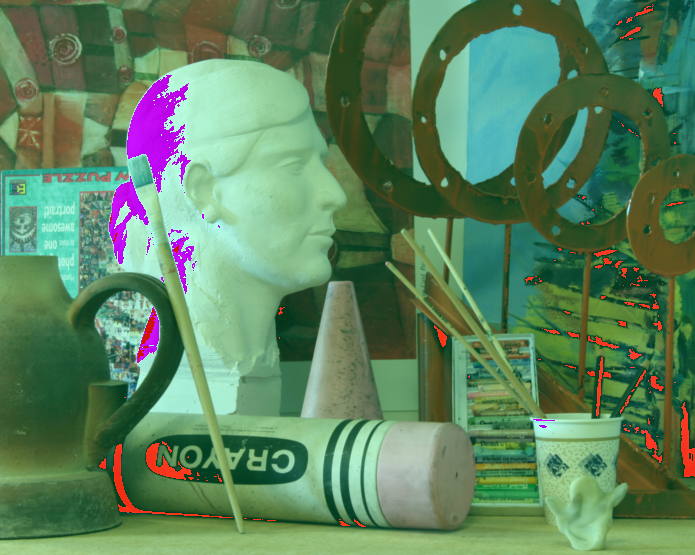

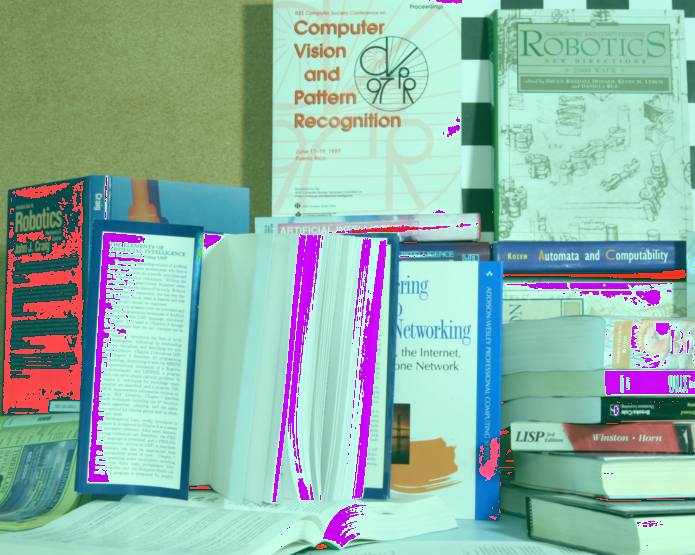

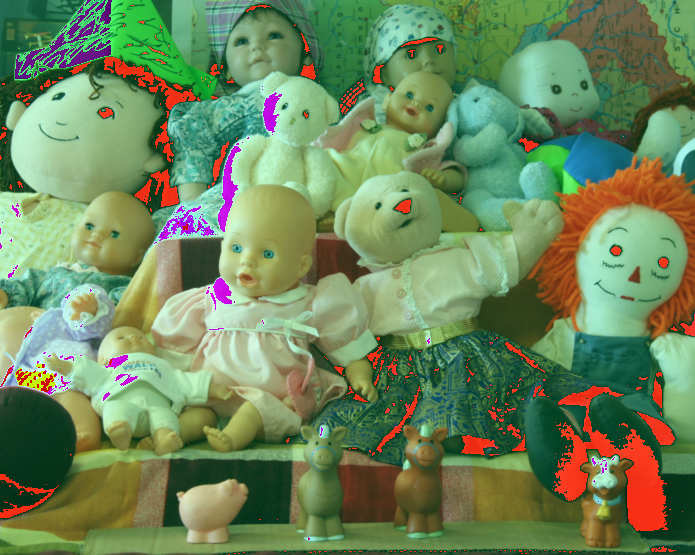

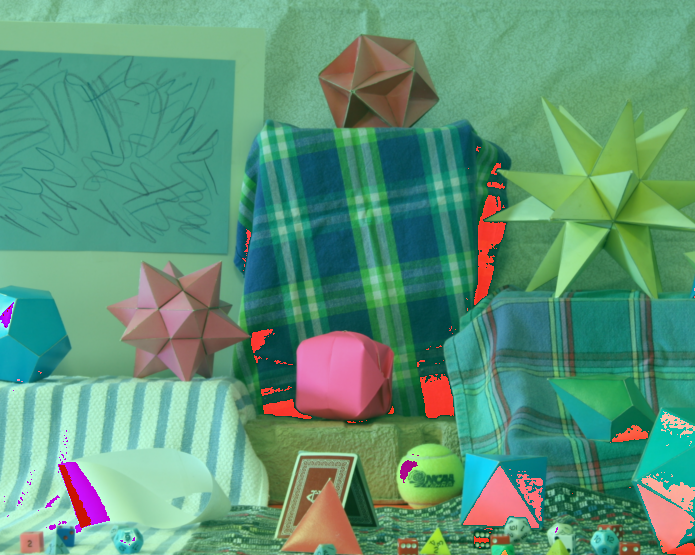

In [ ]:
new_img_tensor = torch.cat([blue_tensor, green_tensor, red_tensor], dim=1)

new_img_tensor = new_img_tensor.transpose(1,3)
new_img_tensor = new_img_tensor.transpose(1,2)


new_image_list = []
for i in range(4):
  image_array = new_img_tensor[i,:,:,:].numpy() 
  new_image_list.append(image_array)
  cv2_imshow(image_array)
